In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Data Preprocessing

In [11]:
df.drop(['PassengerId', 'Name', 'Ticket', 'Cabin', 'Embarked'], axis = 1, inplace = True)

In [12]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [15]:
#now make Sex column as integer using Label Incoder
from sklearn.preprocessing import LabelEncoder

In [16]:
sex_n = LabelEncoder()

In [17]:
df['Sex_n'] = sex_n.fit_transform(df.Sex)

In [ ]:
#now remove the Sex column with string data
df.drop(['Sex'], axis = 1, inplace = True)

In [24]:
#now check null values
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [25]:
df.isna().sum()

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
Sex_n         0
dtype: int64

In [33]:
df.fillna(value = df.Age.mean(), inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
 6   Sex_n     891 non-null    int32  
dtypes: float64(2), int32(1), int64(4)
memory usage: 45.4 KB


In [35]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
Sex_n       0
dtype: int64

In [36]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208,0.647587
std,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429,0.477990
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,0.000000
50%,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200,1.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,1.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [37]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_n
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Sex_n,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


In [38]:
df.drop(['Parch'], axis = 1, inplace = True)

In [39]:
df.head()

,Survived,Pclass,Age,SibSp,Fare,Sex_n
0,0,3,22.0,1,7.2500,1
1,1,1,38.0,1,71.2833,0
2,1,3,26.0,0,7.9250,0
3,1,1,35.0,1,53.1000,0
4,0,3,35.0,0,8.0500,1


In [40]:
df.isna().sum()

Survived    0
Pclass      0
Age         0
SibSp       0
Fare        0
Sex_n       0
dtype: int64

# Spliting Data


In [41]:
x = df.drop(['Survived'], axis = 1)
y = df['Survived']

In [160]:
x.head()

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22.0,1,7.2500,1
1,1,38.0,1,71.2833,0
2,3,26.0,0,7.9250,0
3,1,35.0,1,53.1000,0
4,3,35.0,0,8.0500,1


In [170]:
x.Age = x.Age.astype(int)
x.Fare = x.Fare.astype(int)

In [172]:
x.head()

,Pclass,Age,SibSp,Fare,Sex_n
0,3,22,1,7,1
1,1,38,1,71,0
2,3,26,0,7,0
3,1,35,1,53,0
4,3,35,0,8,1


In [173]:
import matplotlib.pyplot as plt

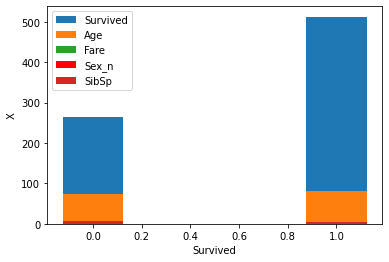

In [174]:
plt.bar(df.Survived,df.Fare, width=0.25)
plt.bar(df.Survived,df.Age,  width=0.25)
plt.bar(df.Survived,df.Sex_n, width=0.25)
plt.bar(df.Survived,df.Pclass, color = 'red', width=0.25)
plt.bar(df.Survived,df.SibSp, width=0.25)
plt.xlabel('Survived')
plt.ylabel('X')
plt.legend(labels = ['Survived', 'Age', 'Fare', 'Sex_n', 'SibSp'])

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [178]:
len(x_train)

712

# Apply model

In [179]:
from sklearn.linear_model import LogisticRegression

In [180]:
from sklearn.ensemble import RandomForestClassifier

In [181]:
from sklearn.tree import DecisionTreeClassifier

In [182]:
from sklearn.svm import SVC

In [183]:
from sklearn.model_selection import cross_val_score

In [184]:
LR = LogisticRegression()
LR.fit(x_train, y_train)
LR.score(x_test, y_test)

0.8603351955307262

In [223]:
RFC = RandomForestClassifier(random_state=99)
RFC.fit(x_train, y_train)
RFC.score(x_test, y_test)

0.8603351955307262

In [186]:
DTC = DecisionTreeClassifier()
DTC.fit(x_train, y_train)
DTC.score(x_test, y_test)

0.8268156424581006

In [187]:
SV = SVC()
SV.fit(x_train, y_train)
SV.score(x_test, y_test)

0.7430167597765364

In [188]:
cross_val_score(LogisticRegression(), x, y, cv = 3)

array([0.78114478, 0.79461279, 0.79124579])

In [189]:
cross_val_score(RandomForestClassifier(random_state=432), x, y, cv = 3)

array([0.78114478, 0.82491582, 0.79461279])

In [190]:
cross_val_score(DecisionTreeClassifier(), x, y, cv = 3)

array([0.76094276, 0.79461279, 0.78114478])

In [191]:
cross_val_score(SVC(), x, y, cv = 3)

array([0.62626263, 0.66329966, 0.67676768])

In [192]:
x_train.head()

,Pclass,Age,SibSp,Fare,Sex_n
507,1,29,0,26,1
579,3,32,0,7,1
560,3,29,0,7,1
687,3,19,0,10,1
122,2,32,1,30,1


In [195]:
y_train.head()

507    1
579    1
560    0
687    0
122    0
Name: Survived, dtype: int64

In [224]:
p = RFC.predict(x_test)

In [225]:
a = y_test

In [226]:
d = pd.DataFrame(a)
d['Predicted'] = p

In [227]:
d

,Survived,Predicted
452,0,0
672,0,0
142,1,1
540,1,1
371,0,0
...,...,...
490,0,0
143,0,0
418,0,0
228,0,0


In [206]:
len(y_test)

179

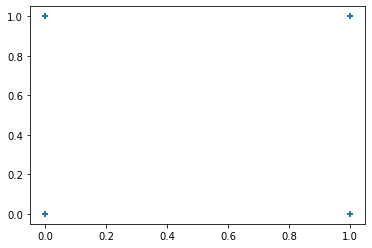

In [228]:
plt.scatter(d.Survived, d.Predicted, marker = '+')

In [237]:
d['male']= x_test.Sex_n[x_test.Sex_n == 1]

In [238]:
d['female'] = x_test.Sex_n[x_test.Sex_n == 0]

In [258]:
d.male = d.male.fillna(2).astype(int)

In [259]:
d.female =  d.female.fillna(3).astype(int)

In [334]:
x_test.head()

,Pclass,Age,SibSp,Fare,Sex_n
452,1,30,0,27,1
672,2,70,0,10,1
142,3,24,1,15,0
540,1,36,0,71,0
371,3,18,1,6,1


In [335]:
d['Fare'] = x_test.Fare

In [262]:
len(x_test)

179

In [302]:
d.drop(['female', 'maleS', 'maleNS','femaleS', 'femaleNS' ], axis = 1, inplace= True)

In [336]:
d.head()

,Survived,Predicted,male,Fare
452,0,0,1,27
672,0,0,1,10
142,1,1,0,15
540,1,1,0,71
371,0,0,1,6


In [304]:
women = d[d['male'] == 0]
men = d[d['male'] == 1]

In [327]:
w = women[women['Survived'] == 1]
wn = women[women['Survived'] == 0]

In [344]:
import numpy as np

In [347]:
x = np.arange(len(wn))

ValueError: shape mismatch: objects cannot be broadcast to a single shape

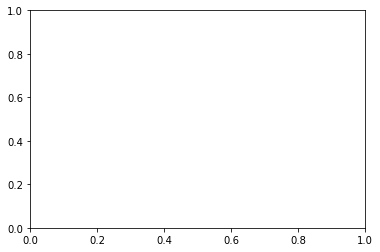

In [357]:
plt.bar(x,w )